# Variance Bias Tradeoff

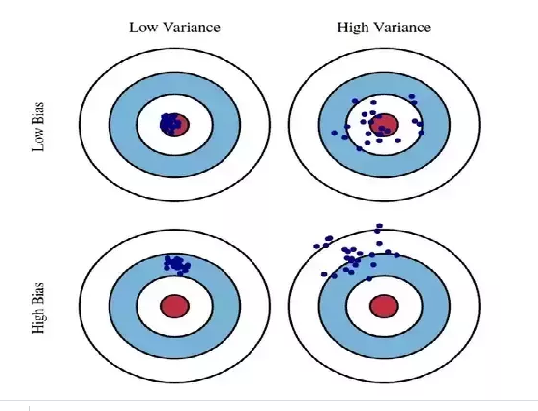

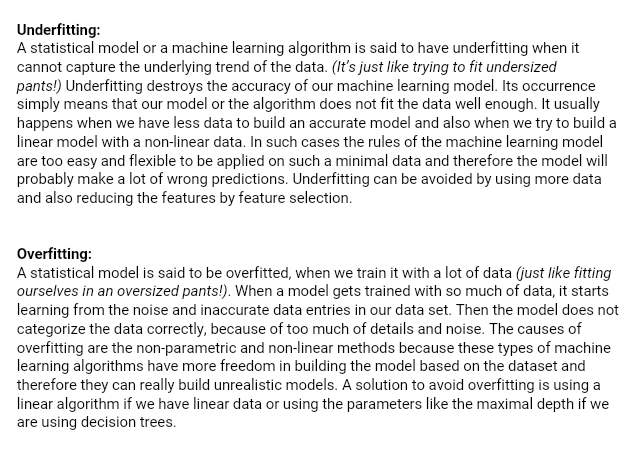

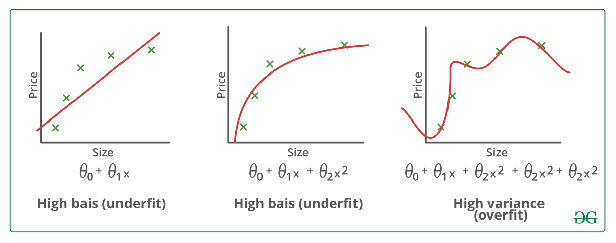

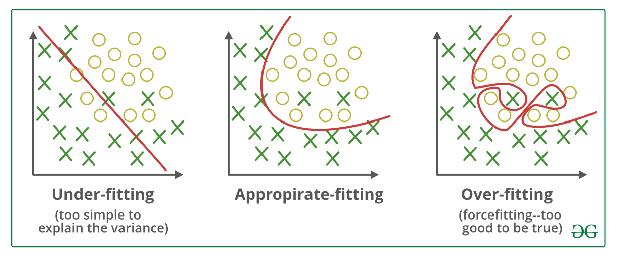

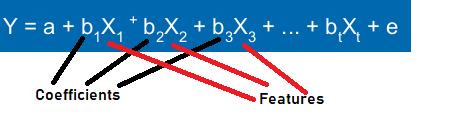

LASSO REGRESSION

RIDGE REGESSION

ALPHA PARAMETER

ELASTIC NET

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston=load_boston()

C:\Users\sayan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [4]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [6]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [7]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [8]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [10]:
x=boston.data
y=boston.target

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=47)

In [12]:
x_train.shape

(339, 13)

In [13]:
y_train.shape

(339,)

In [14]:
x_test.shape

(167, 13)

In [15]:
y_test.shape

(167,)

In [16]:
lm=LinearRegression()

In [17]:
lm.fit(x_train,y_train)

LinearRegression()

In [18]:
lm.score(x_train,y_train) #How good the training data is fitting into the model.

0.7665529829880268

In [19]:
lm.coef_

array([-1.10843155e-01,  3.66995321e-02,  8.74460015e-03,  3.32218225e+00,
       -1.71846638e+01,  4.81511727e+00, -1.38022222e-02, -1.44146494e+00,
        2.63392383e-01, -1.17496784e-02, -9.25130518e-01,  9.07087108e-03,
       -4.12146398e-01])

In [54]:
lm.intercept_

29.05220383531936

In [20]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

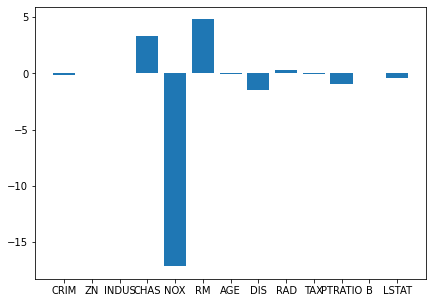

In [21]:
plt.figure(figsize=(7,5))
plt.bar(boston.feature_names,lm.coef_)
plt.show()

# Regularization::L1 and L2 Regularization

In [22]:
from sklearn.linear_model import Lasso,Ridge

In [23]:
# x_train, x_test, y_train, y_test

In [24]:
#will reduce the coefficient to zero if the features are not informative
#alpha values could be -------> 0.0001, 0.001, 0.1, 0.1, 1, 10 ------>higher values reduce all coefficients towards zero and impact output
#Default value of alpha=10
#

ls=Lasso(alpha=0.0001) #Creating the instance of Lasso regression.
ls.fit(x_train,y_train)
ls.score(x_train,y_train) #How good the training data is fitting into the model


0.7665529400345414

In [25]:
ls.coef_

array([-1.10824693e-01,  3.67066154e-02,  8.58729659e-03,  3.32038457e+00,
       -1.71509902e+01,  4.81528448e+00, -1.38318082e-02, -1.44099502e+00,
        2.63304303e-01, -1.17526095e-02, -9.24709393e-01,  9.07325563e-03,
       -4.12162696e-01])

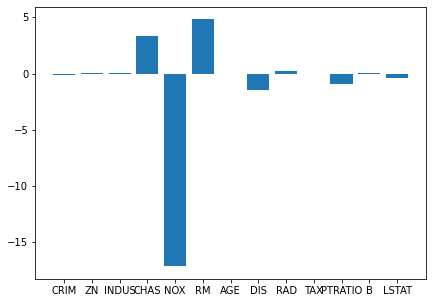

In [26]:
plt.figure(figsize=(7,5))
plt.bar(boston.feature_names,ls.coef_)
plt.show()

In [27]:
#try to minimize the coefficient variance

rd=Ridge(alpha=0.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train) #How good the training data is fitting into the model

0.7665529828886577

In [28]:
rd.coef_

array([-1.10842268e-01,  3.66998800e-02,  8.73686616e-03,  3.32215005e+00,
       -1.71830063e+01,  4.81513570e+00, -1.38038984e-02, -1.44144307e+00,
        2.63388003e-01, -1.17498140e-02, -9.25109364e-01,  9.07099128e-03,
       -4.12146425e-01])

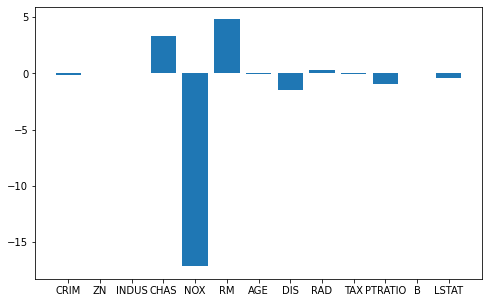

In [29]:
plt.figure(figsize=(8,5))
plt.bar(boston.feature_names,rd.coef_)
plt.show()

In [30]:
#ElasticNet is a combination of both Lasso and Ridge

from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train)) #How good the training data is fitting into the model
enr.coef_

0.7665498739655398


array([-1.10686350e-01,  3.67611422e-02,  7.37727002e-03,  3.31588047e+00,
       -1.68916472e+01,  4.81825513e+00, -1.40961471e-02, -1.43758689e+00,
        2.62619134e-01, -1.17737697e-02, -9.21396641e-01,  9.09208744e-03,
       -4.12160129e-01])

In [31]:
#Incresing the alpha value to notice the change in score.
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.001)
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train)) #How good the training data is fitting into the model
enr.coef_


0.7663157835876332


array([-1.09478601e-01,  3.72470133e-02, -3.11040414e-03,  3.26334531e+00,
       -1.46266776e+01,  4.84120309e+00, -1.63542873e-02, -1.40757630e+00,
        2.56717593e-01, -1.19648591e-02, -8.92659868e-01,  9.25588471e-03,
       -4.12376183e-01])

In [32]:
#Incresing the alpha value to notice the change in score.
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.01)
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train)) #How good the training data is fitting into the model
enr.coef_

0.7618527084798506


array([-0.10508915,  0.03945995, -0.04317831,  2.91107032, -5.894993  ,
        4.87007853, -0.02442378, -1.29366231,  0.23628253, -0.01281645,
       -0.78665601,  0.00986745, -0.41761284])

# SUPPORT VECTOR MACHINES(Linear, Poly, rbf)

In [33]:
from sklearn.svm import SVR     #SVR- Surrort vector regressor

svr=SVR(kernel='linear') #intantiating object from class
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
pred_y=svr.predict(x_test)
print(pred_y)

0.7390428007452163
[17.94108151 30.95692233 21.82026836 29.77046808 26.71774236 20.01808098
 23.66433089 30.89547216 30.17161871 20.28633843 24.4244357  27.34422343
 18.66573557 25.74021088 27.66807151 11.1176236  34.78014339 15.87091187
 11.60982542 15.84487241 32.74933406 19.51837462 38.03954973 19.12106723
 26.52542072 16.64544068 23.09566338 20.87144208 19.61340796 25.08166302
 13.97938382 24.59099588 15.70604503  7.2189344  29.57139183 19.38719516
 11.37180538 26.34066062 21.80051439 19.01475061 23.92081109 24.43696751
 35.90088083 21.45582545 30.34615905 15.88104219  2.18373851 26.56164917
 34.68077649 22.56091406 27.33492102 23.20255063  5.89011002 23.74622377
  4.85360934 21.67391319 17.98724776 11.93572137  4.87282748 29.15850907
 11.31638026 15.01334806 15.16683799 19.49645866 40.27227502 21.59076821
 19.96140051 22.68647255 25.14817763 24.50019931 26.3820037  18.05391722
 24.17936562 21.01174652 30.38875877 14.30030594 17.54227269 18.8483411
 17.1394232  14.17349519  0.59140

In [34]:
from sklearn.svm import SVR

svr=SVR(kernel='poly')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
pred_y=svr.predict(x_test)
pred_y

0.21984205036201276


array([24.00158214, 24.10045352, 19.66149947, 24.19404617, 23.72980738,
       20.24763968, 14.61091303, 22.33566489, 20.59191098, 17.11113942,
       22.91057398, 24.05518997, 20.13829476, 16.53744441, 20.45649728,
       20.7721043 , 24.08171581, 22.13160815, 14.66848569, 21.7723086 ,
       23.51552213, 22.03813213, 22.31953398, 15.29385808, 23.11254516,
       11.92956305, 22.7901004 , 22.51422931, 15.64439737, 23.82160121,
       21.38973085, 23.49589931, 17.24550088, 14.38494334, 22.18328784,
       22.59396353, 12.00305411, 23.72493445, 22.55171801, 22.6861405 ,
       23.34405865, 22.04368868, 20.6954235 , 22.71306661, 21.98680468,
       15.06196744, 12.01987116, 22.1991777 , 22.12669711, 23.14067862,
       23.33066264, 22.82755702, 13.55270406, 22.44739587, 14.28231881,
       22.41656449, 22.30324191, 14.86622536, 13.94453568, 23.41017995,
       12.18923213, 21.98804169, 13.9467562 , 20.36404727, 24.11157676,
       21.09607953, 23.22219219, 22.2619002 , 23.54917029, 20.39

In [35]:
from sklearn.svm import SVR

svr=SVR(kernel='rbf')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
pred_y=svr.predict(x_test)
pred_y

0.22924996554545518


array([23.28744134, 24.56631358, 18.46788571, 24.71247389, 23.63365497,
       19.37654012, 15.42079077, 23.08463582, 19.91760361, 16.07283145,
       23.99245456, 24.20352244, 19.20781723, 15.93298859, 19.71862163,
       20.32705259, 23.38813836, 21.63917456, 15.21690356, 22.08296183,
       24.61322324, 22.41408217, 22.43797101, 15.68228779, 23.60405219,
       13.1356742 , 22.96661344, 21.28691871, 15.72338131, 23.80585188,
       21.7286332 , 23.53659785, 16.12229577, 15.53022173, 22.35804844,
       22.64810536, 13.04619512, 24.69576529, 22.59646615, 22.71348407,
       23.46490829, 22.29987701, 20.00163233, 22.43112248, 22.1864765 ,
       15.4996442 , 13.33854066, 22.76908036, 22.89178134, 24.17857538,
       22.87320299, 23.24431762, 14.96564362, 22.59120107, 15.50525114,
       22.97791384, 22.49893981, 15.60462996, 15.28462021, 21.73752155,
       13.09239213, 22.62645151, 14.99894616, 19.47772653, 25.02670173,
       20.59807296, 22.49473978, 21.00555132, 23.33452147, 19.76

In [36]:
from sklearn.svm import SVR

kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.7390428007452163
0.21984205036201276
0.22924996554545518


# Curse of dimensionality reduction

# PCA- Principal component analysis

In [37]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [38]:
data=pd.read_csv('sonar.csv')

In [39]:
data=pd.DataFrame(data=data)
data

#The dataset is containing 60 coulmns which is too high

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [40]:
x=data.iloc[:,0:-1]

In [41]:
pca=PCA(n_components=10) #instantiating object 'pca' from 'PCA' class

#n_components is the number of required columns.


#class is the blueprint of an object.
#Infinite number of objects can be created from class

In [42]:
y=data.iloc[:,-1]

In [43]:
xpca=pca.fit_transform(x) #tranforming x into 10 columns from 60 columns

In [44]:
xpca

array([[-0.97028528,  1.01765376,  0.83043188, ...,  0.38483746,
         0.00432916, -0.08267912],
       [-0.32443537,  0.87687629,  0.22820349, ...,  0.08107182,
         0.01418477, -0.43233413],
       [ 0.85357147,  0.69773427, -0.02360152, ..., -0.21542372,
        -0.53395533, -0.42518212],
       ...,
       [ 0.30676251, -1.1477555 ,  0.24897546, ...,  0.2278663 ,
        -0.07013224, -0.31329401],
       [-0.03808313, -0.99404889,  0.20193818, ...,  0.06950374,
        -0.02440647, -0.16530256],
       [-0.04390414, -0.91080234,  0.00916917, ..., -0.01910024,
         0.12012993, -0.13796362]])

In [45]:
x=xpca

In [46]:
pd.DataFrame(data=x)

#Now we can see that there are only 10 columns

,0,1,2,3,4,5,6,7,8,9
0,-0.970285,1.017654,0.830432,0.120147,0.299120,0.202682,-0.226988,0.384837,0.004329,-0.082679
1,-0.324435,0.876876,0.228203,0.868926,0.098053,-0.269122,-0.421778,0.081072,0.014185,-0.432334
2,0.853571,0.697734,-0.023602,-0.123425,-0.584388,0.351808,0.478187,-0.215424,-0.533955,-0.425182
3,-0.061337,0.226034,0.635198,0.152907,0.150982,0.081111,-0.374523,0.070143,0.119454,-0.427480
4,-0.605423,0.901962,0.804550,0.271896,0.496832,0.464410,-0.224909,0.105504,-0.202842,-0.235048
...,...,...,...,...,...,...,...,...,...,...
202,0.049918,-1.028980,0.265634,0.026018,-0.014738,0.097506,0.012021,0.178998,0.029362,-0.268631
203,0.228374,-1.149870,0.200437,0.043461,0.182020,0.010158,0.084858,0.266152,-0.068963,-0.307679
204,0.306763,-1.147756,0.248975,-0.058557,0.161337,0.013778,0.049391,0.227866,-0.070132,-0.313294
205,-0.038083,-0.994049,0.201938,-0.060790,-0.147673,-0.088874,0.018656,0.069504,-0.024406,-0.165303


# SCALING

### Min_Max scaler

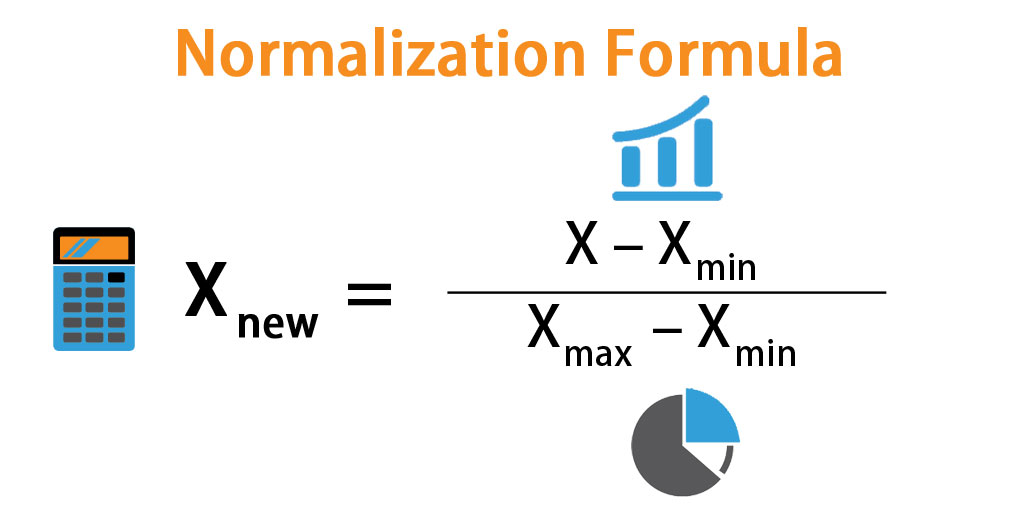

### Standard Scaler

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scale=StandardScaler() #initiating object from class

In [49]:
x=scale.fit_transform(x) #appling standard scaling on x
x

array([[-1.29978169,  1.70606442,  2.15236817, ...,  1.79447233,
         0.02192769, -0.45429916],
       [-0.43460945,  1.47005543,  0.59147287, ...,  0.37803268,
         0.07184752, -2.37555778],
       [ 1.14343337,  1.16972949, -0.06117199, ..., -1.00450695,
        -2.70454535, -2.33625944],
       ...,
       [ 0.41093512, -1.92417588,  0.64531104, ...,  1.06252591,
        -0.3552279 , -1.72146488],
       [-0.05101567, -1.66649159,  0.5233967 , ...,  0.32409149,
        -0.12362156, -0.90829238],
       [-0.05881343, -1.52693138,  0.02376526, ..., -0.08906321,
         0.60847198, -0.75807236]])

In [50]:
pd.DataFrame(data=x)

#All data in x are now satndard normally distributed

,0,1,2,3,4,5,6,7,8,9
0,-1.299782,1.706064,2.152368,0.358625,0.997108,0.727071,-0.842246,1.794472,0.021928,-0.454299
1,-0.434609,1.470055,0.591473,2.593655,0.326857,-0.965406,-1.565023,0.378033,0.071848,-2.375558
2,1.143433,1.169729,-0.061172,-0.368412,-1.948042,1.262019,1.774328,-1.004507,-2.704545,-2.336259
3,-0.082166,0.378940,1.646347,0.456411,0.503293,0.290964,-1.389681,0.327072,0.605049,-2.348888
4,-0.811017,1.512111,2.085286,0.811582,1.656176,1.665949,-0.834532,0.491960,-1.027419,-1.291525
...,...,...,...,...,...,...,...,...,...,...
202,0.066870,-1.725052,0.688489,0.077660,-0.049129,0.349777,0.044606,0.834656,0.148722,-1.476054
203,0.305927,-1.927721,0.519507,0.129726,0.606760,0.036438,0.314868,1.241048,-0.349308,-1.690610
204,0.410935,-1.924176,0.645311,-0.174787,0.537812,0.049424,0.183268,1.062526,-0.355228,-1.721465
205,-0.051016,-1.666492,0.523397,-0.181451,-0.492263,-0.318813,0.069222,0.324091,-0.123622,-0.908292


In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=45)

In [52]:
lr=LogisticRegression()

In [53]:
lr.fit(x_train,y_train)


LogisticRegression()